# <center> Systematic Trading Strategies with Machine Learning Algorithms </center>

## <center>Programming Session 1 - Trend Scanning for Labeling Financial Time Series
</center>
<center>
<table class="tfo-notebook-buttons" style="margin-left: auto; margin-right: auto;">
  <tr>
    <td style="text-align: center; vertical-align: middle;">
      <a target="_blank" href="https://hm-ai.github.io/Systematic_Trading_Strategies_with_Machine_Learning_Algorithms/">
        <img src="https://drive.google.com/uc?export=view&id=1hTIoxoea8RTLgKb1oE6_PFmtTNPGs5p4" height="50"/>
        <br>Course page
      </a>
    </td>
    <td style="text-align: center; vertical-align: middle;">
      <a target="_blank" href="https://colab.research.google.com/drive/1mX89yYXrN4KNY5zL6G893Z2X5WiRIcHg?usp=sharing">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />
        <br>Run in Google Colab
      </a>
    </td>
  </tr>
</table>
</center>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import statsmodels.api as sm1

## Visualizing Linear Trends: Understanding the Impact of Horizon Choices

---
**Q1:**

You are tasked with writing a Python function named `tValLinR` that performs a linear regression analysis on a time series of stock closing prices to evaluate the trend over time. The function should calculate and return the t-value of the slope coefficient and the coefficients of the regression itself.

**Function Specifications:**
- The function should accept a single parameter named `close`, which is a pandas Series object representing the closing prices of a stock over time.
- Inside the function, prepare a design matrix `x` for the linear regression. This matrix should have two columns: the first column filled with ones (to model the intercept) and the second column containing a sequence of integers starting from 0 up to the length of the `close` series minus one (to model the time component).
- Utilize the `OLS` class from the `statsmodels.api` module (assumed to be imported as `sm1`) to fit the linear regression model. Assume the closing prices (`close`) as the dependent variable and your design matrix `x` as the independent variable.
- After fitting the model, extract the t-value of the slope coefficient and the regression coefficients.
- Return a tuple containing the t-value of the slope coefficient and the regression coefficients from your function.

**Requirements:**
1. Implement the `tValLinR` function following the specifications above.
2. Ensure your function returns the results as specified.
3. Provide a brief explanation of how your function processes the input data to produce the output.

---


In [ ]:
def tValLinR(close):
    """
    Calculate the t-value and coefficients of the slope from a linear regression of the time series.

    Parameters:
    - close (pd.Series): A pandas series of closing prices.

    Returns:
    - tuple: (t-value of the slope coefficient, coefficients of the regression)
    """
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sm1.OLS(close, x).fit()
    return ols.tvalues[1], ols.params

---
**Q2:**  

You are tasked with implementing a Python function named `plot_trend_lines` that visualizes the trend of stock prices over a specified observation span. This function should plot linear regression lines for selected windows within the observation span, coloring these lines based on their t-values to indicate the strength and direction of the trend.

**Function Specifications:**  
- **Parameter `price_series` (pd.Series):** Time series data representing stock prices.
- **Parameter `observation_span` (tuple):** A tuple `(min_value, max_value)` defining the range of observation periods over which to analyze trends.
- **Parameter `index`:** The specific index within the `price_series` for which to plot the regression lines. This can be a date (for time series indexed by date) or an integer index.
- **Parameter `num_plots` (int):** Number of regression lines to generate, uniformly spaced within the observation span.
- **Parameter `look_forward` (bool):** If `True`, the function analyzes trends looking forward from the index. If `False`, it analyzes trends looking backward.
- **Parameter `plot_directory` (str or None):** Directory where the plot should be saved. If `None`, the plot is displayed using `plt.show()`.

**Requirements:**  
1. Implement the `plot_trend_lines` function adhering to the specifications outlined above.
2. The function should first check if the specified `index` is present in the `price_series`. If not, it should raise a `ValueError`.
3. Determine points for plotting based on the `observation_span` and `num_plots`, and for each point, calculate the t-value and coefficients of a linear regression on the selected data segment.
4. Plot the regression lines, coloring them based on their t-values. Also, include a scatter plot of the original time series data and highlight the specific `index` with a distinct marker.
5. The function should optionally save the plot to the specified `plot_directory` or display it.
6. Provide a brief explanation of your implementation, focusing on how it processes the input parameters to generate the output plot.

---


In [ ]:
def plot_trend_lines(price_series, observation_span, index, num_plots, look_forward=True, plot_directory=None):
    """
    Plot regression lines for selected windows within the observation span for a specific index.
    The lines are colored based on their t-values.

    Parameters:
    - price_series (pd.Series): Time series data.
    - observation_span (tuple): Tuple (min_value, max_value) defining the range of observation periods.
    - index: The specific index for which to plot the regression lines.
    - num_plots (int): Number of plots to generate, uniformly spaced within the observation span.
    - look_forward (bool): If True, analyzes forward trends. Otherwise, analyzes backward trends.
    - plot_directory (str or None): Directory to save the plot. If None, displays the plot.
    """
    ### YOUR CODE HERE ###
    pass

---
**Q3:**  

You are given a dataset of Bitcoin (BTC). Your task is to analyze the BTC closing price trends within a specific time frame, focusing on how changing the observation span affects the interpretation of these trends.

**Task Details:**

1. **Data Loading and Preparation:**
   - Load the Bitcoin closing prices into a pandas DataFrame named `df_prices`. Ensure you parse the `"date"` column as datetime and set it as the index of the DataFrame.
   - Filter the data to include only the rows corresponding to Bitcoin (`"BTC"`).

2. **Data Selection:**
   - From the prepared DataFrame, select the closing prices for a specific period, from "2021-09-01" to "2021-12-31", and store this subset in a variable named `close`.

3. **Trend Visualization:**
   - Utilize the function `plot_trend_lines` to visualize the trend lines for two different observation spans within the selected data:
     - First, with an observation span from 20 to 30 days starting from "2021-09-04 00:00:00".
     - Second, with an observation span from 20 to 80 days starting from the same date.
   - For each case, generate 3 plots, uniformly spaced within the respective observation spans, to illustrate how the trend perception changes with the span length.

**Questions:**

A. Write the code to perform the data loading, preparation, and selection tasks as described above.

B. Using the provided `plot_trend_lines` function, write the code to visualize the trend lines for the specified observation spans. Include comments in your code to indicate which observation span might suggest a negative trend (-1) and which might suggest a positive trend (+1), based on the visualized trends.

C. Discuss how the choice of observation span might influence the interpretation of trends in financial time series data. Reflect on the implications of this for predictive modeling in financial markets.

**Requirements:**
- Ensure your code is well-commented to explain your logic and choices.
- Provide a brief discussion on the significance of observation span in trend analysis and its potential impact on predictive modeling outcomes.


---


In [ ]:
## Getting the data
url='https://drive.google.com/uc?id=1-Cm4x9lVGQ36pkCLaztQrimzxjXxTHcF'
df_prices = pd.read_csv(url, parse_dates=["date"], index_col="date")
df_prices = df_prices[df_prices["coin"] == "BTC"]

In [ ]:
# Visualize the first rows
df_prices.head(5)

,coin,open,high,low,close,volume
date,,,,,,
2018-01-01 01:00:00,BTC,13791.4,13804.9,13680.0,13680.0,5.922596
2018-01-01 02:00:00,BTC,13500.4,13600.0,13480.0,13514.0,9.326084
2018-01-01 03:00:00,BTC,13512.0,13576.4,13512.0,13560.2,11.704644
2018-01-01 04:00:00,BTC,13694.8,13809.8,13667.4,13667.4,17.126073
2018-01-01 05:00:00,BTC,13763.3,13887.9,13658.6,13765.0,9.322753


In [ ]:
## Select a subset of the data
close = df_prices["close"]
start_date = "2021-09-01"
end_date = "2021-12-31"
close = close.loc[start_date:end_date]

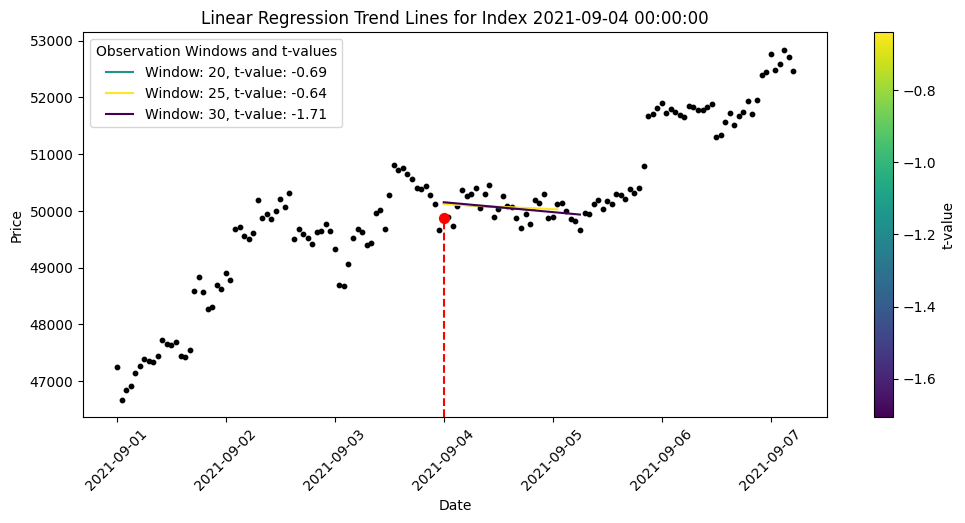

In [ ]:
## Label -1 for a short horizon
plot_trend_lines(close[:150], (20, 30), "2021-09-04 00:00:00", num_plots=3, look_forward=True, plot_directory=None)

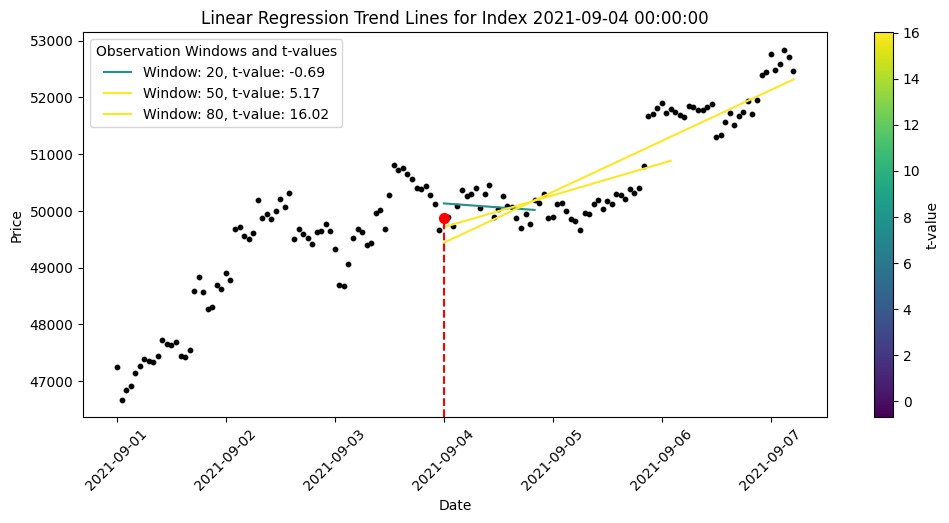

In [ ]:
## Label +1 for a long horizon
plot_trend_lines(close[:150], (20, 80), "2021-09-04 00:00:00", num_plots=3, look_forward=True, plot_directory=None)

## Labeling Time Series Segments using Trend Scanning

---
**Q4:**

In this exercise, you're tasked with developing a Python function named `trend_labels`. This function will categorize segments of a financial time series into trends based on the slope over a given observation span. It's designed to identify significant upward or downward trends in stock prices, which can be crucial for informing trading strategies and investment decisions.

**Function Specifications:**

- **Input `price_series` (pd.Series):** A pandas Series containing numerical values (e.g., stock prices), indexed by dates or integers.
- **Input `observation_span` (tuple):** Specifies the range (min, max) of observation periods for trend analysis.
- **Input `look_forward` (bool):** If `True`, analyze trends looking forward from each point. If `False`, analyze trends looking backward.

**Objectives:**

- Iterate over the series, analyzing trends over various windows within the observation span.
- Calculate the t-value for each segment, representing the statistical significance of its slope.
- Label each segment with its trend direction based on the analysis, and return a detailed DataFrame.

**Expected Output:**

A DataFrame with columns:
- `'t1'`: End date of the window with the maximum t-value observed.
- `'tVal'`: Maximum t-value across all observation windows.
- `'bin'`: Trend direction (+1 for upward, -1 for downward).
- `'windowSize'`: Size of the window leading to the maximum t-value.

**Tasks:**

A. **Implement the Function:** Follow the details above to create the `trend_labels` function.

B. **Function Analysis:** Explain how your function identifies the most significant trend within each window and assigns labels.

C. **Application Discussion:** Discuss potential applications and limitations of using trend labels in trading algorithms or investment analysis.

**Requirements:**

- Your code should be well-commented, explaining key sections and your implementation choices.
- Discuss the relevance of trend labels for financial decision-making, considering both their applications and limitations.

---


In [ ]:
def trend_labels(price_series, observation_span, look_forward=True):
    """
    Generate labels for segments of a time series based on the trend (slope) over a specified observation span.

    Parameters:
    - price_series (pd.Series): A pandas series of prices or any numerical values, indexed by dates or integers.
    - observation_span (tuple): A tuple (min_value, max_value) defining the range of observation periods.
    - look_forward (bool): If True, the function analyzes forward trends. If False, it analyzes backward trends.

    Returns:
    - pd.DataFrame: A DataFrame with columns ['t1', 'tVal', 'bin', 'windowSize'].
    """
    ### YOUR CODE HERE ###
    pass

---
**Q6:**

In this task, you are provided with a series of financial closing prices. Your main objective is to apply trend labeling over a defined observation span within a specific timeframe.

**Goals:**

1. **Filter the Data:**
   - Narrow down the series to the period between "2021-09-01" and "2021-12-31".

2. **Label the Trends:**
   - Utilize the `trend_labels` function on the filtered data with an observation span of (5, 20) hours.

**Tasks:**

1. **Data Preparation:** Filter the `close` series to retain data only within the specified dates. This step ensures that the analysis is concentrated on a period of interest.

2. **Labeling Analysis:** Apply the `trend_labels` function to the prepared dataset. This function is expected to examine the data for trends within the given observation span and label each segment accordingly, providing insights into potential upward or downward movements.

**Expected Deliverables:**

- A DataFrame containing trend labels for the observed period, highlighting the end date of each trend (`'t1'`), its statistical significance (`'tVal'`), the direction of the trend (`'bin'`), and the size of the observation window (`'windowSize'`).

---


In [ ]:
## Filter illustrate events
start_date = "2021-09-01"
end_date = "2021-12-31"
close = df_prices["close"]
close = close.loc[start_date:end_date]


labels = trend_labels(close, (5, 20), look_forward=True)

In [ ]:
labels.head(5)

,t1,tVal,bin,windowSize
date,,,,
2021-09-01 00:00:00,2021-09-01 19:00:00,6.399009,1.0,19
2021-09-01 01:00:00,2021-09-01 06:00:00,17.966682,1.0,5
2021-09-01 02:00:00,2021-09-01 13:00:00,8.729954,1.0,11
2021-09-01 03:00:00,2021-09-01 13:00:00,7.261158,1.0,10
2021-09-01 04:00:00,2021-09-01 23:00:00,7.071704,1.0,19


In [ ]:
close_events = close.loc[labels.index]

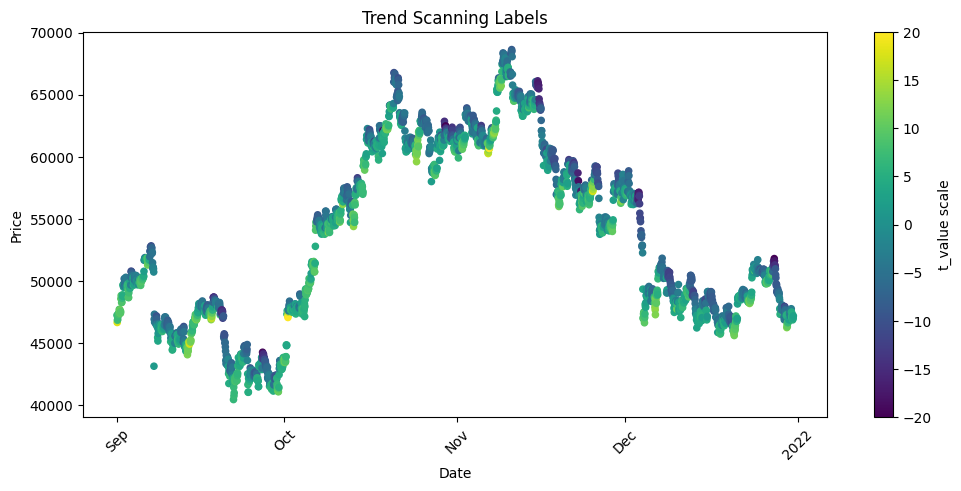

In [ ]:
fig = plt.figure(figsize=(12, 5))  # Increased width
scatter = plt.scatter(x=close_events.index, y=close_events.values, c=labels["tVal"], s=20)

# Adding a colorbar
plt.colorbar(scatter, label='t_value scale')

# Use a more sparse date locator and formatter
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Rotate date labels for better visibility
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Trend Scanning Labels')
plt.show()

### Contact

If you have any question regarding this notebook, do not hesitate to contact: h.madmoun@imperial.ac.uk